In [1]:
# ....Step 1 : Creating the data set using numpy array of 0s and 1s. 
#As the image is a collection of pixel values in matrix, we will create those matrix of pixel for A, B, C 

#using 0 and 1 Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


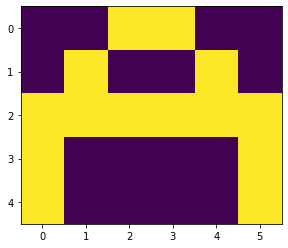

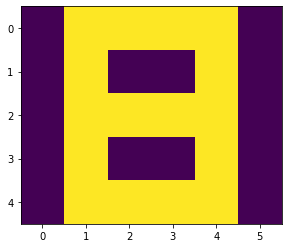

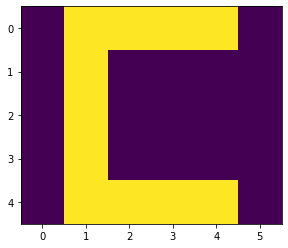

In [2]:
#Step 2 : Visualization of data set "a"
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()


#Step 2 : Visualization of data set "b" 
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()



#Step 2 : Visualization of data set "c"
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()


In [3]:
#Step 3 :As the data set is in the form of list we will convert it into numpy array. 
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
#Step 4 : Defining the architecture or structure of the deep neural network. This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure. 

#1st layer: Input layer(1, 30)
#2nd layer: Hidden layer (1, 5)
#3rd layer: Output layer(3, 3)
 # activation function
    
# Step 5: Declaring and defining all the function to build deep neural network. 

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	
    # hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 1):
		print("Image is of letter A.")
	elif(k == 0):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()

In [5]:
#Step 6: Initializing the weights, as the neural network is having 3 layers, 
#so there will be 2 weight matrix associate with it.
#The size of each matrix depends on the number of nodes in two connecting layers
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[-0.89268439  0.22706532 -1.99231905 -1.88487097 -1.18356473]
 [ 1.20332651  0.30128497  1.53551329 -2.56087519 -2.26152229]
 [-0.59251429  0.32692581 -0.36311658 -0.71484353  0.00619349]
 [-0.30728634  0.4576238   0.13671359  0.77443934  0.76328908]
 [-0.01531182  0.00901068  1.67574761 -0.35333815  0.66168986]
 [ 0.29719676  0.7754721  -1.06792151 -1.64895026  0.68365414]
 [ 0.79583107  0.05753517  0.27797751 -1.87481882 -1.48512323]
 [ 0.47347411 -2.40704616 -2.02235891 -0.94192941 -0.47375398]
 [ 0.83897475  1.01418671 -0.92369679 -0.93375591  0.19010555]
 [-0.49069822 -0.05157335  0.63924493 -0.56512614  0.94362768]
 [-0.41952852  0.22862696  1.50615    -0.69677362 -1.28840092]
 [ 0.76343379  0.25423316 -0.19641219 -0.92975193  1.15509608]
 [ 0.47756609  1.99151559  1.35577717 -1.29619505 -1.68466534]
 [-0.56480926  0.7186752  -1.66267756  0.73222453 -1.85497485]
 [-0.64944486  1.84029     0.72670045 -0.73289213 -1.37589698]
 [-0.00648643 -0.44163033 -0.41546537 -0.41510041  0.78

In [6]:
#Step 7 : Training the model.
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 78.29408283704298
epochs: 2 ======== acc: 78.90935824275105
epochs: 3 ======== acc: 79.45952155507601
epochs: 4 ======== acc: 79.94568626296535
epochs: 5 ======== acc: 80.37446108819157
epochs: 6 ======== acc: 80.75540715993421
epochs: 7 ======== acc: 81.09836071046081
epochs: 8 ======== acc: 81.41193076488565
epochs: 9 ======== acc: 81.70306331228787
epochs: 10 ======== acc: 81.9771512022256
epochs: 11 ======== acc: 82.23831860979075
epochs: 12 ======== acc: 82.48971117638271
epochs: 13 ======== acc: 82.73373850278719
epochs: 14 ======== acc: 82.97226317466043
epochs: 15 ======== acc: 83.20674504806395
epochs: 16 ======== acc: 83.43835155511836
epochs: 17 ======== acc: 83.66804312972029
epochs: 18 ======== acc: 83.89664065611353
epochs: 19 ======== acc: 84.12488000046056
epochs: 20 ======== acc: 84.35345731303478
epochs: 21 ======== acc: 84.58306778721015
epochs: 22 ======== acc: 84.81443979915741
epochs: 23 ======== acc: 85.04836570742081
epochs: 24 ======== a

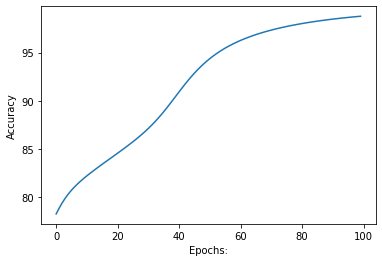

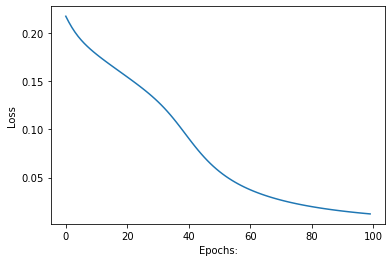

In [7]:
#Step 8 : Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration). 
import matplotlib.pyplot as plt1

# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [8]:
# the trained weights are
print(w1, "\n", w2)

[[-0.89268439  0.22706532 -1.99231905 -1.88487097 -1.18356473]
 [ 1.36598722  0.35836362  1.41729987 -2.58207664 -2.29284663]
 [-0.48420107  0.20444202 -0.18513468 -0.40605955  0.20161224]
 [-0.19897312  0.33514001  0.31469549  1.08322332  0.95870783]
 [ 0.14734889  0.06608933  1.55753419 -0.37453959  0.63036553]
 [ 0.29719676  0.7754721  -1.06792151 -1.64895026  0.68365414]
 [ 0.79583107  0.05753517  0.27797751 -1.87481882 -1.48512323]
 [ 0.58178734 -2.52952995 -1.84437701 -0.63314543 -0.27833523]
 [ 0.83897475  1.01418671 -0.92369679 -0.93375591  0.19010555]
 [-0.49069822 -0.05157335  0.63924493 -0.56512614  0.94362768]
 [-0.82462533  0.84826681  1.67361331 -0.4019205  -1.12220431]
 [ 0.76343379  0.25423316 -0.19641219 -0.92975193  1.15509608]
 [ 0.4232186   1.81195315  1.65197249 -0.96620962 -1.45792225]
 [-0.45649604  0.59619141 -1.48469566  1.04100851 -1.6595561 ]
 [-1.05454168  2.45992985  0.89416376 -0.43803902 -1.20970036]
 [-0.41158324  0.17800951 -0.24800206 -0.1202473   0.95

Image is of letter A.


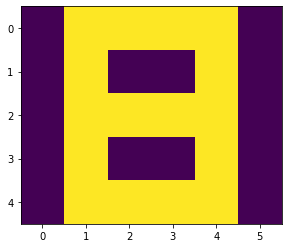

In [9]:
#Step9: Making prediction. 
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)


Image is of letter B.


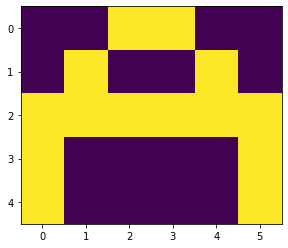

In [10]:
#Step9: Making prediction. 
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[0], w1, w2)

Image is of letter C.


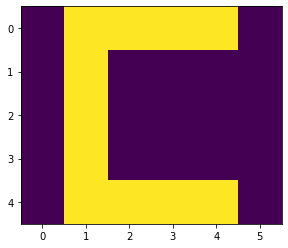

In [11]:
#Step9: Making prediction. 
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[2], w1, w2)